In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# Data description
This dataset collects information medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
● ‘Neighborhood’ indicates the location of the hospital.
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
● The data shows 'Age' for each patient and 'Neighbourhood' or area where appointment is
● It also show of he whether received a SMS or not - and list of other diseases he have or comorbidities

# Question(s) for analysis
What are the different factors affecting patient showing up to his appointment or not?
This factors can include age, Welfareprogram and receiving sms

In [3]:
# Exploring data
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()
#notice max and min values especially for age

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.nunique()
# No duplicate data in appointment ID meaning no duplicate data

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
sum(df.isna().any()) 
# No missing data

0

## Assessing data
1. patient id and appointment id are floats and integers - Convert to strings
2. Column names should be renamed more clearly especially No-show should be modified to be clearly understood
3. Age min and max values are not meaninful (-1 , 115)
4. Age unique values are 104 - needs to double check correct ages


In [8]:
#tiding up data: Column names
# Renaming columns
df = df.rename(columns = {'PatientId':'patient_id', 
                         'AppointmentID':'appointment_id', 
                         'ScheduledDay':'schedule_day', 
                         'AppointmentDay':'appointment_day', 
                         'Hipertension':'hypertension',
                         'Handcap':'handicap', 
                          'No-show':'never_showed'})
df.columns = df.columns.str.lower()

In [9]:
# Column data types
# Convert to objects
df.patient_id = df.patient_id.astype(str).str[:-2]
df.appointment_id = df.appointment_id.astype(str)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   patient_id       110527 non-null  object
 1   appointment_id   110527 non-null  object
 2   gender           110527 non-null  object
 3   schedule_day     110527 non-null  object
 4   appointment_day  110527 non-null  object
 5   age              110527 non-null  int64 
 6   neighbourhood    110527 non-null  object
 7   scholarship      110527 non-null  int64 
 8   hypertension     110527 non-null  int64 
 9   diabetes         110527 non-null  int64 
 10  alcoholism       110527 non-null  int64 
 11  handicap         110527 non-null  int64 
 12  sms_received     110527 non-null  int64 
 13  never_showed     110527 non-null  object
dtypes: int64(7), object(7)
memory usage: 11.8+ MB


In [11]:
df.age.replace(-1, 0, inplace = True) #replacing -1 value which has no meaning

df.age.replace(115, 100, inplace = True) #replacing age of 115 which is too unmeaningful with 100 
                                         #(need to check all ages above 100 from original data source)

In [12]:
df.age.describe()                   # Checking they are replaced with same number of samples

count    110527.000000
mean         37.088205
std          23.108123
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: age, dtype: float64

## Data Visualizations

Text(0, 0.5, 'Patient mean age')

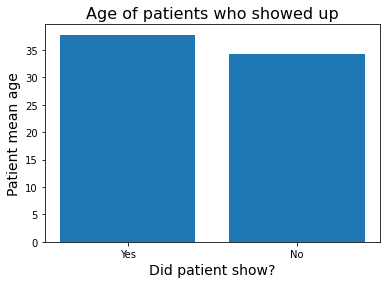

In [13]:
age_means = df.groupby('never_showed')['age'].mean()
plt.bar([1,2], age_means, tick_label = ['Yes', 'No'])
plt.title('Age of patients who showed up', fontsize = 16)
plt.xlabel('Did patient show?', fontsize = 14)
plt.ylabel('Patient mean age', fontsize = 14)

### Conclusion 1: The patients with higher age usually shows up more than younger patients

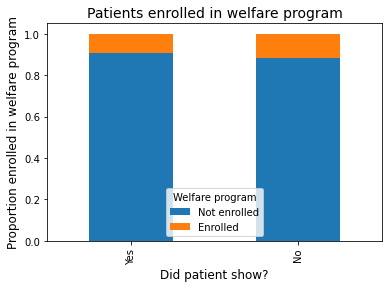

In [14]:
counts1 = df.groupby(['never_showed','scholarship'])['scholarship'].count()
total1 = df.groupby('never_showed').count()['scholarship']
proportion1 = counts1 / total1

proportion1.unstack().plot(kind='bar', stacked=True)
plt.title('Patients enrolled in welfare program', fontsize = 14)
plt.xlabel('Did patient show?', fontsize = 12)
plt.ylabel('Proportion enrolled in welfare program', fontsize = 12)
plt.xticks([0, 1],['Yes', 'No'])
plt.legend([('Not enrolled') , ('Enrolled')] , loc = 'lower center', title = 'Welfare program')

### Conclusion 2: This data shows enrollment in welfare program did not affect attendance to appointment, other factors may contribute to that.

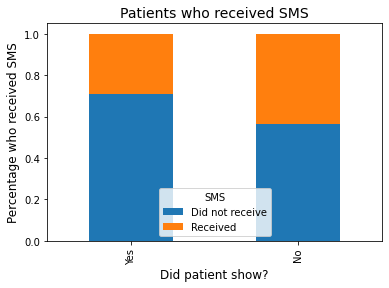

In [15]:
counts2 = df.groupby(['never_showed','sms_received'])['sms_received'].count()
total2 = df.groupby('never_showed').count()['sms_received']
proportion2 = counts2 / total2

proportion2.unstack().plot(kind='bar', stacked=True)
plt.title('Patients who received SMS', fontsize = 14)
plt.xlabel('Did patient show?', fontsize = 12)
plt.ylabel('Percentage who received SMS', fontsize = 12)
plt.xticks([0, 1],['Yes', 'No'])
plt.legend([('Did not receive') , ('Received')] , loc = 'lower center', title = 'SMS')

### Conclusion 3: This data shows that receiving SMS did not affect attendance to appointment, other factors may contribute to that.

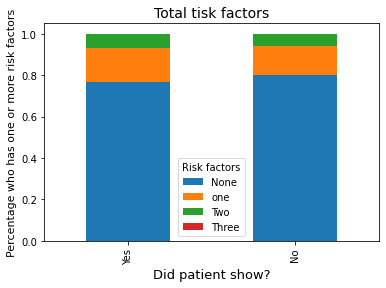

In [16]:
df['risk_factors'] = df['diabetes'] + df['hypertension'] + df['alcoholism']
#Created new column with total numbers of risk factors for each patient

counts4 = df.groupby(['never_showed', 'risk_factors'])['risk_factors'].count()
total4 = df.groupby('never_showed').count()['risk_factors']
proportion4 = counts4 / total4

proportion4.unstack().plot(kind='bar', stacked = True)
plt.title('Total tisk factors', fontsize = 14)
plt.xlabel('Did patient show?', fontsize = 13)
plt.ylabel('Percentage who has one or more risk factors', fontsize = 11)
plt.xticks([0, 1],['Yes', 'No'])
plt.legend([('None'), ('one'), ('Two'), ('Three')] , loc = 'lower center', title = 'Risk factors')

### Conclusion 4: Patients with more risk factors tend to attend their appointments  